In [1]:
import pandas as pd
from sodapy import Socrata
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import rcParams
rcParams['figure.figsize'] = 25, 10
sns.set_style('darkgrid')



In [3]:
df= pd.read_csv('Evaluaciones_Agropecuarias_Municipales_EVA.csv')

In [80]:
df.head()


,CÓD. \nDEP.,DEPARTAMENTO,CÓD. MUN.,MUNICIPIO,GRUPO \nDE CULTIVO,SUBGRUPO \nDE CULTIVO,CULTIVO,DESAGREGACIÓN REGIONAL Y/O SISTEMA PRODUCTIVO,AÑO,PERIODO,Área Sembrada\n(ha),Área Cosechada\n(ha),Producción\n(t),Rendimiento\n(t/ha),ESTADO FISICO PRODUCCION,NOMBRE \nCIENTIFICO,CICLO DE CULTIVO
190508,52,NARIÑO,52240,CHACHAGUI,HORTALIZAS,TOMATE,TOMATE,TOMATE INVERNADERO,2011,2011B,2,2,578,246.0,HORTALIZA FRESCA,LYCOPERSICUM ESCULETUM,TRANSITORIO
190639,52,NARIÑO,52240,CHACHAGUI,HORTALIZAS,TOMATE,TOMATE,TOMATE INVERNADERO,2012,2012B,2,2,492,246.0,HORTALIZA FRESCA,LYCOPERSICUM ESCULETUM,TRANSITORIO
183127,52,NARIÑO,52240,CHACHAGUI,HORTALIZAS,TOMATE,TOMATE,TOMATE,2012,2012A,3,1,246,246.0,HORTALIZA FRESCA,LYCOPERSICUM ESCULETUM,TRANSITORIO
190437,52,NARIÑO,52240,CHACHAGUI,HORTALIZAS,TOMATE,TOMATE,TOMATE INVERNADERO,2011,2011A,2,1,246,246.0,HORTALIZA FRESCA,LYCOPERSICUM ESCULETUM,TRANSITORIO
190824,52,NARIÑO,52240,CHACHAGUI,HORTALIZAS,TOMATE,TOMATE,TOMATE INVERNADERO,2013,2013B,2,2,492,246.0,HORTALIZA FRESCA,LYCOPERSICUM ESCULETUM,TRANSITORIO


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206068 entries, 0 to 206067
Data columns (total 17 columns):
 #   Column                                         Non-Null Count   Dtype  
---  ------                                         --------------   -----  
 0   CÓD. 
DEP.                                     206068 non-null  int64  
 1   DEPARTAMENTO                                   206068 non-null  object 
 2   CÓD. MUN.                                      206068 non-null  int64  
 3   MUNICIPIO                                      206067 non-null  object 
 4   GRUPO 
DE CULTIVO                              206068 non-null  object 
 5   SUBGRUPO 
DE CULTIVO                           206068 non-null  object 
 6   CULTIVO                                        206068 non-null  object 
 7   DESAGREGACIÓN REGIONAL Y/O SISTEMA PRODUCTIVO  206068 non-null  object 
 8   AÑO                                            206068 non-null  int64  
 9   PERIODO                              

In [20]:
df['GRUPO \nDE CULTIVO'].unique()

array(['HORTALIZAS', 'PLANTAS AROMATICAS, CONDIMENTARIAS Y MEDICINALES',
       'TUBERCULOS Y PLATANOS', 'FRUTALES', 'OLEAGINOSAS', 'LEGUMINOSAS',
       'FIBRAS', 'FLORES Y FOLLAJES', 'CEREALES', 'OTROS PERMANENTES',
       'FORESTALES', 'HONGOS', 'OTROS TRANSITORIOS'], dtype=object)

In [46]:
df.dropna(subset=['Rendimiento\n(t/ha)'], inplace=True)


### Vamos a revisar cuales son los cultivos con mejor rendimiento en Colombia y cual es el que tiene el mayor rendimiento

In [53]:
df.sort_values('Rendimiento\n(t/ha)', ascending=False, inplace=True)

In [55]:
df.head(5)

,CÓD. \nDEP.,DEPARTAMENTO,CÓD. MUN.,MUNICIPIO,GRUPO \nDE CULTIVO,SUBGRUPO \nDE CULTIVO,CULTIVO,DESAGREGACIÓN REGIONAL Y/O SISTEMA PRODUCTIVO,AÑO,PERIODO,Área Sembrada\n(ha),Área Cosechada\n(ha),Producción\n(t),Rendimiento\n(t/ha),ESTADO FISICO PRODUCCION,NOMBRE \nCIENTIFICO,CICLO DE CULTIVO
190508,52,NARIÑO,52240,CHACHAGUI,HORTALIZAS,TOMATE,TOMATE,TOMATE INVERNADERO,2011,2011B,2,2,578,246.0,HORTALIZA FRESCA,LYCOPERSICUM ESCULETUM,TRANSITORIO
190639,52,NARIÑO,52240,CHACHAGUI,HORTALIZAS,TOMATE,TOMATE,TOMATE INVERNADERO,2012,2012B,2,2,492,246.0,HORTALIZA FRESCA,LYCOPERSICUM ESCULETUM,TRANSITORIO
183127,52,NARIÑO,52240,CHACHAGUI,HORTALIZAS,TOMATE,TOMATE,TOMATE,2012,2012A,3,1,246,246.0,HORTALIZA FRESCA,LYCOPERSICUM ESCULETUM,TRANSITORIO
190437,52,NARIÑO,52240,CHACHAGUI,HORTALIZAS,TOMATE,TOMATE,TOMATE INVERNADERO,2011,2011A,2,1,246,246.0,HORTALIZA FRESCA,LYCOPERSICUM ESCULETUM,TRANSITORIO
190824,52,NARIÑO,52240,CHACHAGUI,HORTALIZAS,TOMATE,TOMATE,TOMATE INVERNADERO,2013,2013B,2,2,492,246.0,HORTALIZA FRESCA,LYCOPERSICUM ESCULETUM,TRANSITORIO


Text(0.5, 1.0, 'Rendimiento de los tipos de cultivos en Colombia')

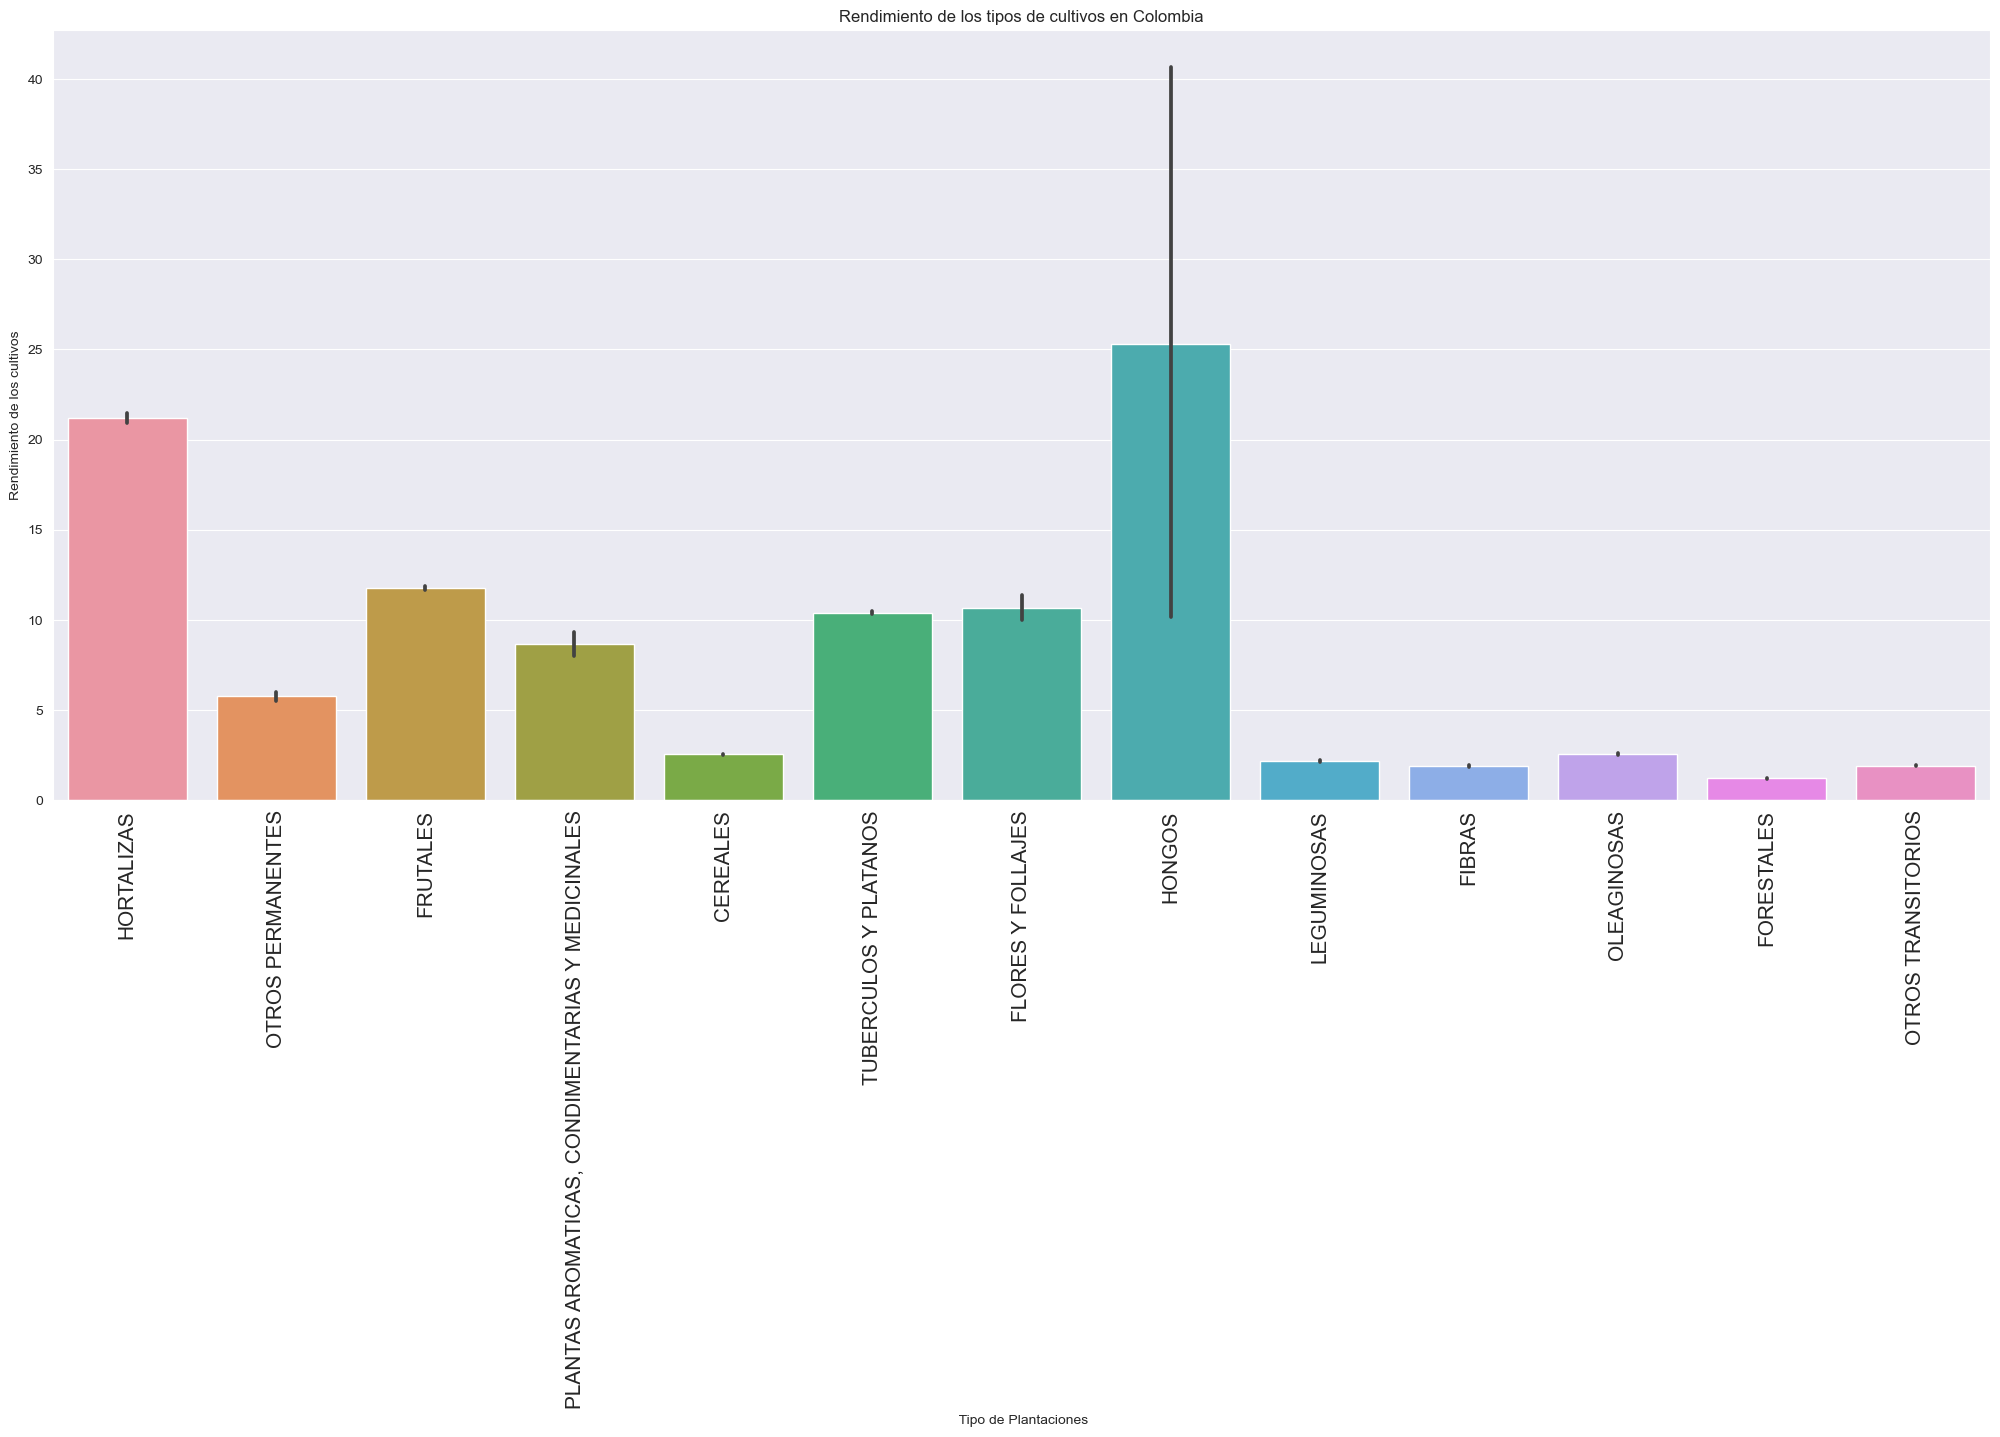

In [68]:
Out=sns.barplot(x='GRUPO \nDE CULTIVO', y='Rendimiento\n(t/ha)', data=df)
plt.xticks( rotation='vertical', size=15)
Out.set_xlabel(' Tipo de Plantaciones')
Out.set_ylabel('Rendimiento de los cultivos')
plt.title('Rendimiento de los tipos de cultivos en Colombia')

### ¿Cómo es la relación que existe entre la producción de los distintos cultivos en Colombia?

Text(0.5, 1.0, 'Grupo de cultivo y la cosecha en el país')

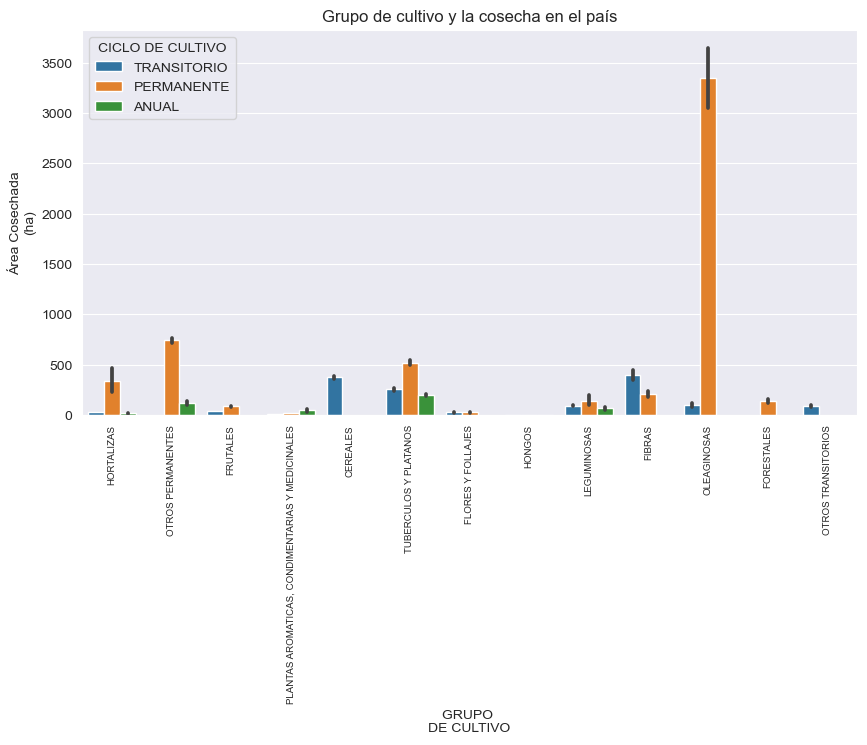

In [82]:
f,ax= plt.subplots(figsize=(10,5))
Out=sns.barplot(x='GRUPO \nDE CULTIVO',y='Área Cosechada\n(ha)', data=df, hue='CICLO DE CULTIVO')
plt.xticks( rotation='vertical', size=7)
plt.title('Grupo de cultivo y la cosecha en el país')

Text(0.5, 1.0, 'Grupo de cultivo y la cosecha en el país')

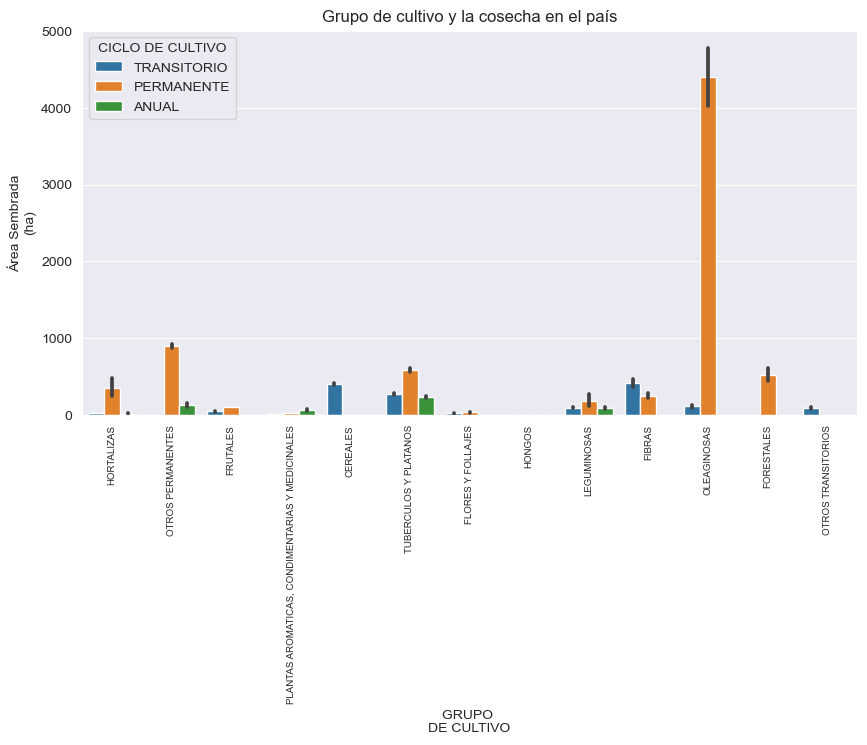

In [84]:
f,ax= plt.subplots(figsize=(10,5))
Out=sns.barplot(x='GRUPO \nDE CULTIVO',y='Área Sembrada\n(ha)', data=df, hue='CICLO DE CULTIVO')
plt.xticks( rotation='vertical', size=7)
plt.title('Grupo de cultivo y la cosecha en el país')

### Ahora se verá la subgregación de los cultivos

In [89]:
df.head()


,CÓD. \nDEP.,DEPARTAMENTO,CÓD. MUN.,MUNICIPIO,GRUPO \nDE CULTIVO,SUBGRUPO \nDE CULTIVO,CULTIVO,DESAGREGACIÓN REGIONAL Y/O SISTEMA PRODUCTIVO,AÑO,PERIODO,Área Sembrada\n(ha),Área Cosechada\n(ha),Producción\n(t),Rendimiento\n(t/ha),ESTADO FISICO PRODUCCION,NOMBRE \nCIENTIFICO,CICLO DE CULTIVO
190508,52,NARIÑO,52240,CHACHAGUI,HORTALIZAS,TOMATE,TOMATE,TOMATE INVERNADERO,2011,2011B,2,2,578,246.0,HORTALIZA FRESCA,LYCOPERSICUM ESCULETUM,TRANSITORIO
190639,52,NARIÑO,52240,CHACHAGUI,HORTALIZAS,TOMATE,TOMATE,TOMATE INVERNADERO,2012,2012B,2,2,492,246.0,HORTALIZA FRESCA,LYCOPERSICUM ESCULETUM,TRANSITORIO
183127,52,NARIÑO,52240,CHACHAGUI,HORTALIZAS,TOMATE,TOMATE,TOMATE,2012,2012A,3,1,246,246.0,HORTALIZA FRESCA,LYCOPERSICUM ESCULETUM,TRANSITORIO
190437,52,NARIÑO,52240,CHACHAGUI,HORTALIZAS,TOMATE,TOMATE,TOMATE INVERNADERO,2011,2011A,2,1,246,246.0,HORTALIZA FRESCA,LYCOPERSICUM ESCULETUM,TRANSITORIO
190824,52,NARIÑO,52240,CHACHAGUI,HORTALIZAS,TOMATE,TOMATE,TOMATE INVERNADERO,2013,2013B,2,2,492,246.0,HORTALIZA FRESCA,LYCOPERSICUM ESCULETUM,TRANSITORIO


In [109]:
df.groupby('CULTIVO')['Área Sembrada\n(ha)', 'Rendimiento\n(t/ha)'].sum('Área Sembrada\n(ha)').sort_values( 'Rendimiento\n(t/ha)', ascending=False)


C:\Users\saesc\AppData\Local\Temp\ipykernel_19992\2619566226.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('CULTIVO')['Área Sembrada\n(ha)', 'Rendimiento\n(t/ha)'].sum('Área Sembrada\n(ha)').sort_values( 'Rendimiento\n(t/ha)', ascending=False)


,Área Sembrada\n(ha),Rendimiento\n(t/ha)
CULTIVO,,
TOMATE,205598,369165.05
PAPA,2099482,114794.33
YUCA,2605175,99051.28
CAÑA AZUCARERA,2811949,72609.56
PLATANO,5329972,67035.03
...,...,...
PROTEA,50,2.00
FLOR DE SAFARI,4,2.00
ESPARTO,12,1.11


In [ ]:
Cultivos, Rendimiento, Año= [x,y,z in df.columns(['CULTIVO',''])]

In [49]:
AnaliAño=pd.DataFrame()

In [54]:
Cultivo = []
Año = []
Rendimiento = []
Produccion= []




for cultivo, año, rendimiento, produccion in zip(df['CULTIVO'], df['AÑO'], df['Rendimiento\n(t/ha)'], df['Producción\n(t)']):
    if año in [2017, 2019, 2018, 2016] and cultivo in ['TOMATE', 'PAPA', 'YUCA']:
        Cultivo.append(cultivo)
        Año.append(año)
        Rendimiento.append(rendimiento)
        Produccion.append(produccion)



In [55]:
AnaliAño['Cultivo']=Cultivo
AnaliAño['Año']=Año
AnaliAño['Rendimiento']=Rendimiento
AnaliAño['Produccion']=Produccion

In [56]:
AnaliAño.head()

,Cultivo,Año,Rendimiento,Produccion
0,PAPA,2016,24.0,19200
1,PAPA,2016,32.0,15149
2,PAPA,2016,15.5,7332
3,PAPA,2016,18.0,7488
4,PAPA,2016,20.0,3200


C:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


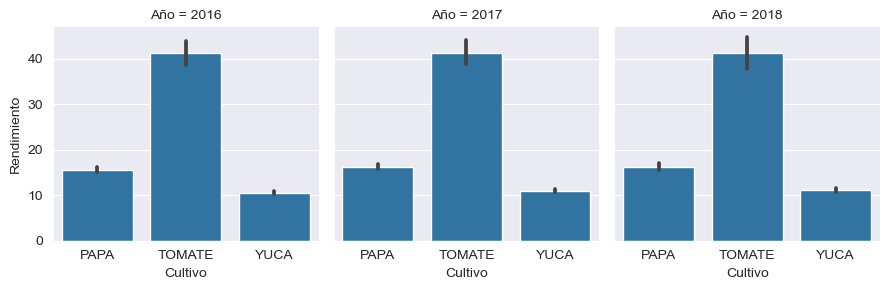

In [60]:
g = sns.FacetGrid(AnaliAño, col='Año')
g.map(sns.barplot, 'Cultivo', 'Rendimiento')

